In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

In [2]:

import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [3]:
# get the data
from sqlalchemy import create_engine
connection_string = 'mysql+pymysql://root:' + password + '@localhost/giess_den_kiez'
engine = create_engine(connection_string, pool_size=10, max_overflow=20)
query = '''select * from merged_clean_data;'''

data = pd.read_sql_query(query, engine)
data.head(10)

,id,lng,lat,district,species,genus,street,year,timing_of_watering,watering_quantity_in_liters,temperature_2m_max,temperature_2m_min,temperature_2m_mean,sunrise,sunset,daylight_duration,sunshine_duration,rain_sum,snowfall_sum,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,no_degree,with_degree,no_prof_qualification,prof_qualification,residents,avg_age,below 1500 (%),1500-2000 (%),2000-3000 (%),3000-4000 (%),4000 and more (%),gini_coefficient,at_risk_of_poverty_rate,unemployed
0,_vhs6sa3vk,13.40757,52.58571,Pankow,Linde,LINDE,WaldowstraÃŸe,1984,2021-03-18,10.0,4.058500,-2.8915,0.368917,0.0,0.0,43613.230,38995.04300,0.5,0.70,27.475807,50.399998,14.954717,/,313300,64100,266800,420768,"41,2","17,6",11,"24,6","13,9","32,9","0,3","12,1","3,1"
1,_vhs6sa3vk,13.40757,52.58571,Pankow,Linde,LINDE,WaldowstraÃŸe,1984,2021-03-19,25.0,3.358500,-3.9915,0.258500,0.0,0.0,43863.105,25733.00400,0.0,0.07,19.969458,33.839996,283.619020,/,313300,64100,266800,420768,"41,2","17,6",11,"24,6","13,9","32,9","0,3","12,1","3,1"
2,_lur9t5w9p,13.35009,52.52184,Mitte,Winter-Linde 'Greenspire',LINDE,ThomasiusstraÃŸe,2005,2021-03-20,10.0,9.158501,1.9585,5.046000,0.0,0.0,44112.766,18649.12300,2.1,0.00,30.421598,54.719997,292.121980,20200,297700,94300,232400,395599,"39,1","21,8","12,9","24,5","13,8",27,"0,35","23,2","5,2"
3,_vhs6sa3vk,13.40757,52.58571,Pankow,Linde,LINDE,WaldowstraÃŸe,1984,2021-03-22,10.0,7.608500,3.6085,5.585583,0.0,0.0,44610.863,972.37836,0.0,0.00,15.893093,27.720000,286.914670,/,313300,64100,266800,420768,"41,2","17,6",11,"24,6","13,9","32,9","0,3","12,1","3,1"
4,_vhs6sa3vk,13.40757,52.58571,Pankow,Linde,LINDE,WaldowstraÃŸe,1984,2021-03-22,10.0,7.608500,3.6085,5.585583,0.0,0.0,44610.863,972.37836,0.0,0.00,15.893093,27.720000,286.914670,/,313300,64100,266800,420768,"41,2","17,6",11,"24,6","13,9","32,9","0,3","12,1","3,1"
5,_lur9t5w9p,13.35009,52.52184,Mitte,Winter-Linde 'Greenspire',LINDE,ThomasiusstraÃŸe,2005,2021-03-24,10.0,14.408501,0.5585,7.589750,0.0,0.0,45106.324,38218.29700,0.0,0.00,12.074766,25.199999,238.771680,20200,297700,94300,232400,395599,"39,1","21,8","12,9","24,5","13,8",27,"0,35","23,2","5,2"
6,_cx5slhza9,13.40808,52.53714,Pankow,Gemeine Rosskastanie,ROSSKASTANIE,Kastanienallee,1998,2021-03-26,50.0,10.408501,3.6585,6.870999,0.0,0.0,45597.934,29966.92800,2.8,0.00,29.168886,56.880000,239.785000,/,313300,64100,266800,420768,"41,2","17,6",11,"24,6","13,9","32,9","0,3","12,1","3,1"
7,_lur9t5w9p,13.35009,52.52184,Mitte,Winter-Linde 'Greenspire',LINDE,ThomasiusstraÃŸe,2005,2021-03-28,10.0,17.708500,7.8085,11.673083,0.0,0.0,46084.660,16718.90000,0.1,0.00,19.652176,35.640000,233.155000,20200,297700,94300,232400,395599,"39,1","21,8","12,9","24,5","13,8",27,"0,35","23,2","5,2"
8,_lj0cr7jul,13.46929,52.51242,Friedrichshain-Kreuzberg,Kaiser-Linde,LINDE,ScharnweberstraÃŸe,1995,2021-03-30,25.0,21.708500,4.3585,13.223084,0.0,0.0,46571.930,42255.56000,0.0,0.00,11.631956,20.160000,200.949770,13600,218900,64900,175000,293231,"38,8","18,5","13,9","24,4","16,5","26,6","0,33",18,"4,5"
9,_sqh0sipx8,13.39873,52.57284,Pankow,Baum-Hasel,HASEL,Grabbeallee,1975,2021-03-31,10.0,16.958500,6.0085,10.610583,0.0,0.0,46816.594,22115.74600,1.0,0.00,25.006397,43.920000,319.359500,/,313300,64100,266800,420768,"41,2","17,6",11,"24,6","13,9","32,9","0,3","12,1","3,1"


In [4]:
data.dtypes

id                              object
lng                            float64
lat                            float64
district                        object
species                         object
genus                           object
street                          object
year                             int64
timing_of_watering              object
watering_quantity_in_liters    float64
temperature_2m_max             float64
temperature_2m_min             float64
temperature_2m_mean            float64
sunrise                        float64
sunset                         float64
daylight_duration              float64
sunshine_duration              float64
rain_sum                       float64
snowfall_sum                   float64
wind_speed_10m_max             float64
wind_gusts_10m_max             float64
wind_direction_10m_dominant    float64
no_degree                       object
with_degree                      int64
no_prof_qualification            int64
prof_qualification       

## Wrangling data

In [5]:
data['no_degree'].value_counts()

no_degree
/        21504
20200     6419
13600     6358
16500     5612
26700     3351
16300     1649
Name: count, dtype: int64

In [6]:
data['no_degree'] = np.where(data['no_degree'].isin(['/']), '0', data['no_degree'])

In [7]:
data['no_degree'].value_counts()

no_degree
0        21504
20200     6419
13600     6358
16500     5612
26700     3351
16300     1649
Name: count, dtype: int64

In [8]:
data['no_degree'] =  pd.to_numeric(data['no_degree'], errors='coerce')

In [9]:
data.dtypes

id                              object
lng                            float64
lat                            float64
district                        object
species                         object
genus                           object
street                          object
year                             int64
timing_of_watering              object
watering_quantity_in_liters    float64
temperature_2m_max             float64
temperature_2m_min             float64
temperature_2m_mean            float64
sunrise                        float64
sunset                         float64
daylight_duration              float64
sunshine_duration              float64
rain_sum                       float64
snowfall_sum                   float64
wind_speed_10m_max             float64
wind_gusts_10m_max             float64
wind_direction_10m_dominant    float64
no_degree                        int64
with_degree                      int64
no_prof_qualification            int64
prof_qualification       

In [10]:
data['avg_age'].value_counts()

avg_age
39,1    6419
45,2    6405
41,2    6379
38,8    6358
44      5612
46,3    3526
41,8    3351
42      2291
43,9    2157
44,6    1649
43,6     402
43,2     344
Name: count, dtype: int64

In [11]:
data['avg_age'] = data['avg_age'].str.replace(',', '.').astype(float)
data['below 1500 (%)'] =  data['below 1500 (%)'].str.replace(',', '.').astype(float)
data['1500-2000 (%)'] =  data['1500-2000 (%)'].str.replace(',', '.').astype(float)
data['2000-3000 (%)'] =  data['2000-3000 (%)'].str.replace(',', '.').astype(float)
data['3000-4000 (%)'] =  data['3000-4000 (%)'].str.replace(',', '.').astype(float)
data['4000 and more (%)'] =  data['4000 and more (%)'].str.replace(',', '.').astype(float)
data['gini_coefficient'] =  data['gini_coefficient'].str.replace(',', '.').astype(float)
data['at_risk_of_poverty_rate'] =  data['at_risk_of_poverty_rate'].str.replace(',', '.').astype(float)
data['unemployed'] =  data['unemployed'].str.replace(',', '.').astype(float)

In [12]:
data.dtypes

id                              object
lng                            float64
lat                            float64
district                        object
species                         object
genus                           object
street                          object
year                             int64
timing_of_watering              object
watering_quantity_in_liters    float64
temperature_2m_max             float64
temperature_2m_min             float64
temperature_2m_mean            float64
sunrise                        float64
sunset                         float64
daylight_duration              float64
sunshine_duration              float64
rain_sum                       float64
snowfall_sum                   float64
wind_speed_10m_max             float64
wind_gusts_10m_max             float64
wind_direction_10m_dominant    float64
no_degree                        int64
with_degree                      int64
no_prof_qualification            int64
prof_qualification       

In [13]:
# We can not really use the date, so let's take the day, month and weekday
data['timing_of_watering'] = pd.to_datetime(data['timing_of_watering'])

data['day_of_watering'] = data['timing_of_watering'].dt.day
data['weekday_of_watering'] = data['timing_of_watering'].dt.weekday
data['month_of_watering'] = data['timing_of_watering'].dt.month
data['year_of_watering'] = data['timing_of_watering'].dt.year
data

,id,lng,lat,district,species,genus,street,year,timing_of_watering,watering_quantity_in_liters,temperature_2m_max,temperature_2m_min,temperature_2m_mean,sunrise,sunset,daylight_duration,sunshine_duration,rain_sum,snowfall_sum,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,no_degree,with_degree,no_prof_qualification,prof_qualification,residents,avg_age,below 1500 (%),1500-2000 (%),2000-3000 (%),3000-4000 (%),4000 and more (%),gini_coefficient,at_risk_of_poverty_rate,unemployed,day_of_watering,weekday_of_watering,month_of_watering,year_of_watering
0,_vhs6sa3vk,13.40757,52.58571,Pankow,Linde,LINDE,WaldowstraÃŸe,1984,2021-03-18,10.0,4.058500,-2.8915,0.368917,0.0,0.0,43613.230,38995.04300,0.500000,0.70,27.475807,50.399998,14.954717,0,313300,64100,266800,420768,41.2,17.6,11.0,24.6,13.9,32.9,0.30,12.1,3.1,18,3,3,2021
1,_vhs6sa3vk,13.40757,52.58571,Pankow,Linde,LINDE,WaldowstraÃŸe,1984,2021-03-19,25.0,3.358500,-3.9915,0.258500,0.0,0.0,43863.105,25733.00400,0.000000,0.07,19.969458,33.839996,283.619020,0,313300,64100,266800,420768,41.2,17.6,11.0,24.6,13.9,32.9,0.30,12.1,3.1,19,4,3,2021
2,_lur9t5w9p,13.35009,52.52184,Mitte,Winter-Linde 'Greenspire',LINDE,ThomasiusstraÃŸe,2005,2021-03-20,10.0,9.158501,1.9585,5.046000,0.0,0.0,44112.766,18649.12300,2.100000,0.00,30.421598,54.719997,292.121980,20200,297700,94300,232400,395599,39.1,21.8,12.9,24.5,13.8,27.0,0.35,23.2,5.2,20,5,3,2021
3,_vhs6sa3vk,13.40757,52.58571,Pankow,Linde,LINDE,WaldowstraÃŸe,1984,2021-03-22,10.0,7.608500,3.6085,5.585583,0.0,0.0,44610.863,972.37836,0.000000,0.00,15.893093,27.720000,286.914670,0,313300,64100,266800,420768,41.2,17.6,11.0,24.6,13.9,32.9,0.30,12.1,3.1,22,0,3,2021
4,_vhs6sa3vk,13.40757,52.58571,Pankow,Linde,LINDE,WaldowstraÃŸe,1984,2021-03-22,10.0,7.608500,3.6085,5.585583,0.0,0.0,44610.863,972.37836,0.000000,0.00,15.893093,27.720000,286.914670,0,313300,64100,266800,420768,41.2,17.6,11.0,24.6,13.9,32.9,0.30,12.1,3.1,22,0,3,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44888,_lur9t5w9p,13.35009,52.52184,Mitte,Winter-Linde 'Greenspire',LINDE,ThomasiusstraÃŸe,2005,2022-12-15,10.0,-1.791500,-9.0415,-5.191500,0.0,0.0,27631.271,20366.82200,0.000000,0.00,10.086427,18.000000,49.323080,20200,297700,94300,232400,395599,39.1,21.8,12.9,24.5,13.8,27.0,0.35,23.2,5.2,15,3,12,2022
44889,_lur9t5w9p,13.35009,52.52184,Mitte,Winter-Linde 'Greenspire',LINDE,ThomasiusstraÃŸe,2005,2022-12-17,10.0,-2.491500,-7.4915,-5.847750,0.0,0.0,27569.947,21621.82000,0.000000,0.00,17.610588,29.160000,148.609790,20200,297700,94300,232400,395599,39.1,21.8,12.9,24.5,13.8,27.0,0.35,23.2,5.2,17,5,12,2022
44890,_lur9t5w9p,13.35009,52.52184,Mitte,Winter-Linde 'Greenspire',LINDE,ThomasiusstraÃŸe,2005,2022-12-20,10.0,6.808500,4.3085,5.558500,0.0,0.0,27526.953,0.00000,2.800000,0.00,16.394829,29.880000,210.208280,20200,297700,94300,232400,395599,39.1,21.8,12.9,24.5,13.8,27.0,0.35,23.2,5.2,20,1,12,2022
44891,_lur9t5w9p,13.35009,52.52184,Mitte,Winter-Linde 'Greenspire',LINDE,ThomasiusstraÃŸe,2005,2022-12-22,10.0,6.358500,3.2085,4.662667,0.0,0.0,27531.520,7266.53700,5.900001,0.00,13.202726,23.039999,228.884500,20200,297700,94300,232400,395599,39.1,21.8,12.9,24.5,13.8,27.0,0.35,23.2,5.2,22,3,12,2022


In [14]:
#Let's correct the data in district

data['district'].value_counts()

district
Mitte                         6419
Charlottenburg-Wilmersdorf    6405
Pankow                        6379
Friedrichshain-Kreuzberg      6358
Tempelhof-SchÃ¶neberg         5612
Steglitz-Zehlendorf           3526
NeukÃ¶lln                     3351
Lichtenberg                   2291
Treptow-KÃ¶penick             2157
Reinickendorf                 1649
Marzahn-Hellersdorf            402
Spandau                        344
Name: count, dtype: int64

In [15]:
data['district'] = data['district'].replace({'Tempelhof-SchÃ¶neberg': 'Tempelhof-Schöneberg',
                                         'NeukÃ¶lln': 'Neukölln', 'Treptow-KÃ¶penick':'Treptow-Köpenick'})

## Split numerical and categorical data

In [16]:
#Split to numerical and categorical

data_num = data.select_dtypes('number')
data_num = data_num.drop(['lng','lat','sunrise','sunset'], axis=1)
data_num

,year,watering_quantity_in_liters,temperature_2m_max,temperature_2m_min,temperature_2m_mean,daylight_duration,sunshine_duration,rain_sum,snowfall_sum,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,no_degree,with_degree,no_prof_qualification,prof_qualification,residents,avg_age,below 1500 (%),1500-2000 (%),2000-3000 (%),3000-4000 (%),4000 and more (%),gini_coefficient,at_risk_of_poverty_rate,unemployed,day_of_watering,weekday_of_watering,month_of_watering,year_of_watering
0,1984,10.0,4.058500,-2.8915,0.368917,43613.230,38995.04300,0.500000,0.70,27.475807,50.399998,14.954717,0,313300,64100,266800,420768,41.2,17.6,11.0,24.6,13.9,32.9,0.30,12.1,3.1,18,3,3,2021
1,1984,25.0,3.358500,-3.9915,0.258500,43863.105,25733.00400,0.000000,0.07,19.969458,33.839996,283.619020,0,313300,64100,266800,420768,41.2,17.6,11.0,24.6,13.9,32.9,0.30,12.1,3.1,19,4,3,2021
2,2005,10.0,9.158501,1.9585,5.046000,44112.766,18649.12300,2.100000,0.00,30.421598,54.719997,292.121980,20200,297700,94300,232400,395599,39.1,21.8,12.9,24.5,13.8,27.0,0.35,23.2,5.2,20,5,3,2021
3,1984,10.0,7.608500,3.6085,5.585583,44610.863,972.37836,0.000000,0.00,15.893093,27.720000,286.914670,0,313300,64100,266800,420768,41.2,17.6,11.0,24.6,13.9,32.9,0.30,12.1,3.1,22,0,3,2021
4,1984,10.0,7.608500,3.6085,5.585583,44610.863,972.37836,0.000000,0.00,15.893093,27.720000,286.914670,0,313300,64100,266800,420768,41.2,17.6,11.0,24.6,13.9,32.9,0.30,12.1,3.1,22,0,3,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44888,2005,10.0,-1.791500,-9.0415,-5.191500,27631.271,20366.82200,0.000000,0.00,10.086427,18.000000,49.323080,20200,297700,94300,232400,395599,39.1,21.8,12.9,24.5,13.8,27.0,0.35,23.2,5.2,15,3,12,2022
44889,2005,10.0,-2.491500,-7.4915,-5.847750,27569.947,21621.82000,0.000000,0.00,17.610588,29.160000,148.609790,20200,297700,94300,232400,395599,39.1,21.8,12.9,24.5,13.8,27.0,0.35,23.2,5.2,17,5,12,2022
44890,2005,10.0,6.808500,4.3085,5.558500,27526.953,0.00000,2.800000,0.00,16.394829,29.880000,210.208280,20200,297700,94300,232400,395599,39.1,21.8,12.9,24.5,13.8,27.0,0.35,23.2,5.2,20,1,12,2022
44891,2005,10.0,6.358500,3.2085,4.662667,27531.520,7266.53700,5.900001,0.00,13.202726,23.039999,228.884500,20200,297700,94300,232400,395599,39.1,21.8,12.9,24.5,13.8,27.0,0.35,23.2,5.2,22,3,12,2022


In [17]:
data_cat = data.select_dtypes('object')
data_cat = data_cat.drop(['id','species','street'], axis=1)
data_cat

,district,genus
0,Pankow,LINDE
1,Pankow,LINDE
2,Mitte,LINDE
3,Pankow,LINDE
4,Pankow,LINDE
...,...,...
44888,Mitte,LINDE
44889,Mitte,LINDE
44890,Mitte,LINDE
44891,Mitte,LINDE


In [18]:
data_cat['genus'].value_counts()

genus
LINDE                17923
AHORN                 8513
ROSSKASTANIE          1857
WEIÃŸDORN             1815
HASEL                 1758
other                 1686
EICHE                 1652
PLATANE               1420
HAINBUCHE             1108
MEHLBEERE              947
BIRNE                  886
BIRKE                  778
ESCHE                  745
ROBINIE                675
ULME                   600
PAPPEL                 519
GLEDITSCHIE            478
GINKGO                 409
AMBERBAUM              237
APFEL                  103
ERLE                    90
MAGNOLIE                86
KASTANIE                85
HOPFENBUCHE             66
PAULOWNIE               59
WEIDE                   54
FELSENBIRNE             43
WALNUSS                 39
GÃ–TTERBAUM             29
HARTRIEGEL              27
KIEFER                  24
BUCHE                   23
PARROTIE                19
SUMPFZYPRESSE           18
MAULBEERE               18
KUCHENBAUM              15
ZÃœRGELBAUM           

In [19]:
data_cat['genus'] = np.where(~data_cat['genus'].isin(['LINDE','AHORN','ROSSKASTANIE','WEIÃŸDORN','HASEL','EICHE','PLATANE','HAINBUCHE']) , 'OTHER', data_cat['genus'])
data_cat['genus'].value_counts()

genus
LINDE           17923
OTHER            8847
AHORN            8513
ROSSKASTANIE     1857
WEIÃŸDORN        1815
HASEL            1758
EICHE            1652
PLATANE          1420
HAINBUCHE        1108
Name: count, dtype: int64

In [20]:
data_cat['genus'] = np.where(data_cat['genus'].isin(['WEIÃŸDORN']) , 'WEISSDORN', data_cat['genus'])
data_cat['genus'].value_counts()

genus
LINDE           17923
OTHER            8847
AHORN            8513
ROSSKASTANIE     1857
WEISSDORN        1815
HASEL            1758
EICHE            1652
PLATANE          1420
HAINBUCHE        1108
Name: count, dtype: int64

In [21]:
data_num_weather = data_num.drop(['no_degree', 'with_degree','no_prof_qualification','prof_qualification','residents','avg_age','below 1500 (%)','1500-2000 (%)', '2000-3000 (%)', '3000-4000 (%)','4000 and more (%)','gini_coefficient','at_risk_of_poverty_rate','unemployed' ], axis=1)

## Correlation

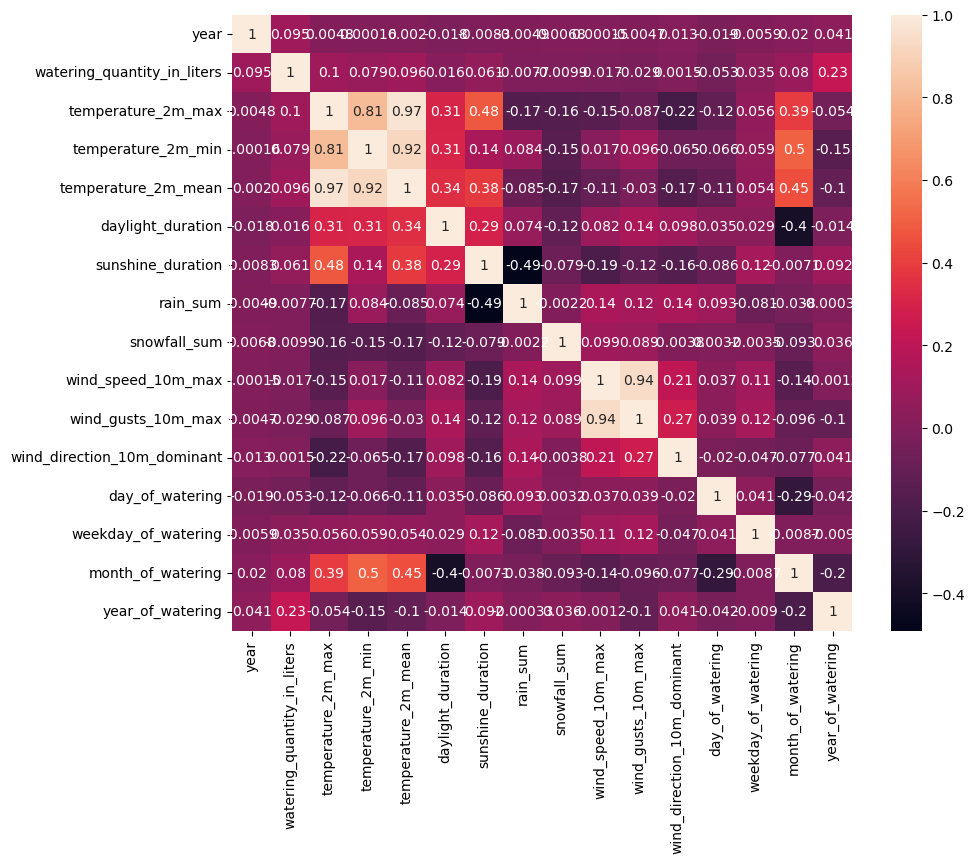

In [22]:
# Let's check the correlation between the numerical values

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

correlations_matrix = data_num_weather.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [23]:
data_num_socio = data_num.drop(['temperature_2m_max','temperature_2m_min','temperature_2m_mean','daylight_duration','sunshine_duration','rain_sum','snowfall_sum', 'wind_speed_10m_max', 'wind_gusts_10m_max','wind_direction_10m_dominant','day_of_watering','weekday_of_watering','month_of_watering','year_of_watering' ], axis=1)

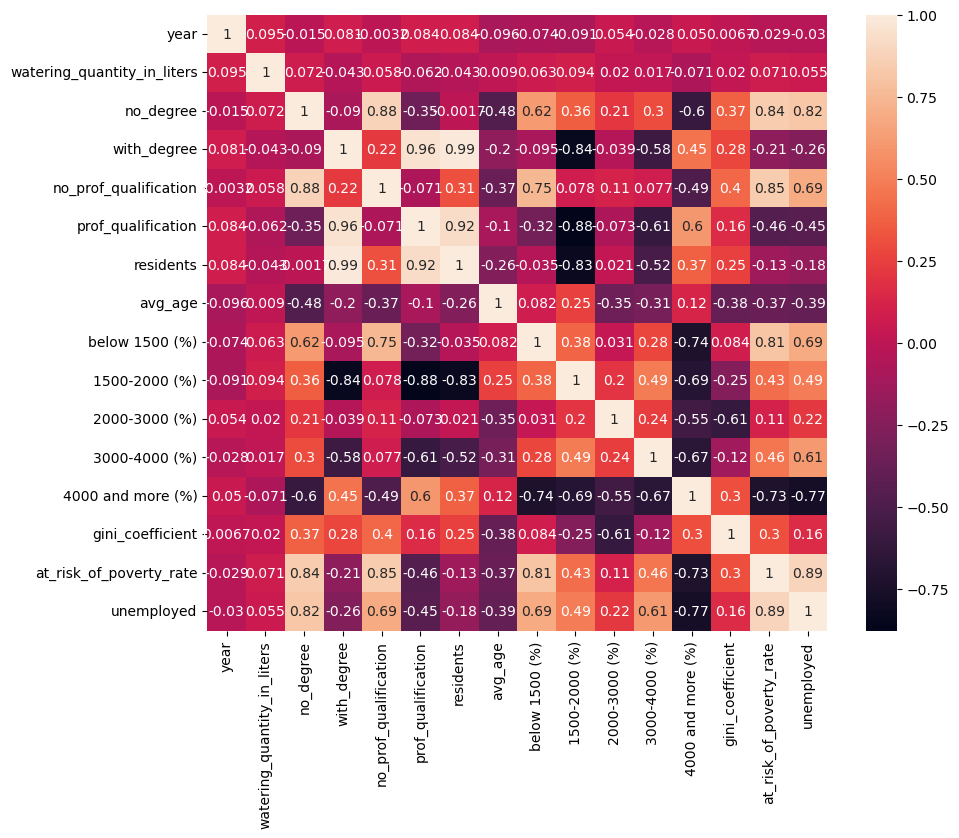

In [24]:
plt.figure(figsize=(10, 8))

correlations_matrix = data_num_socio.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

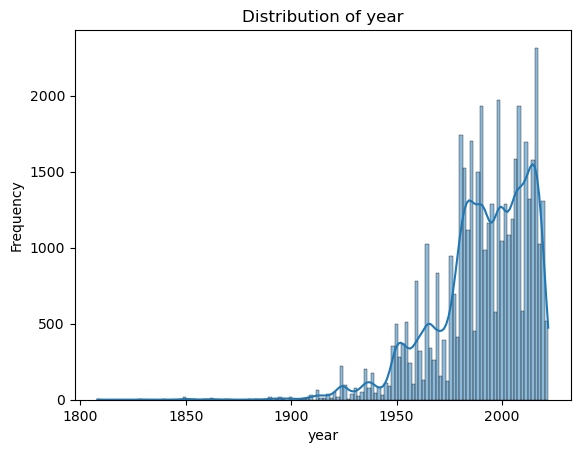

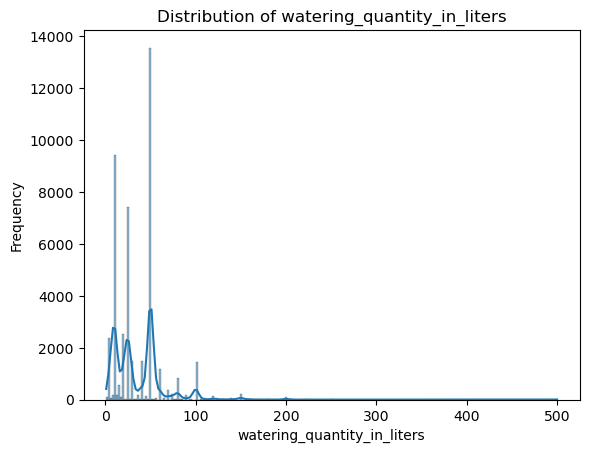

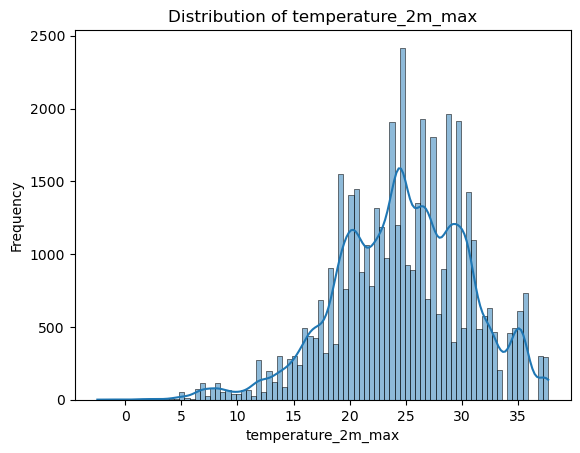

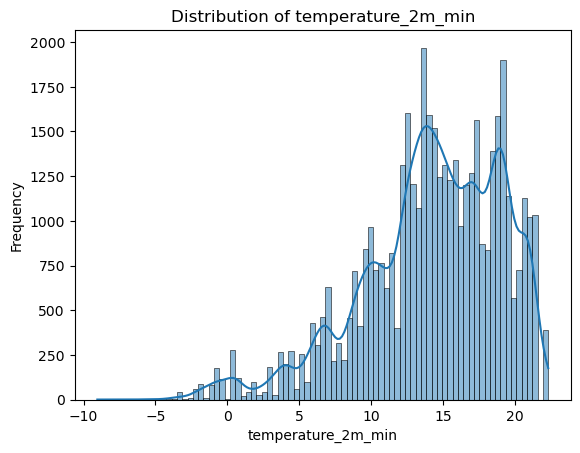

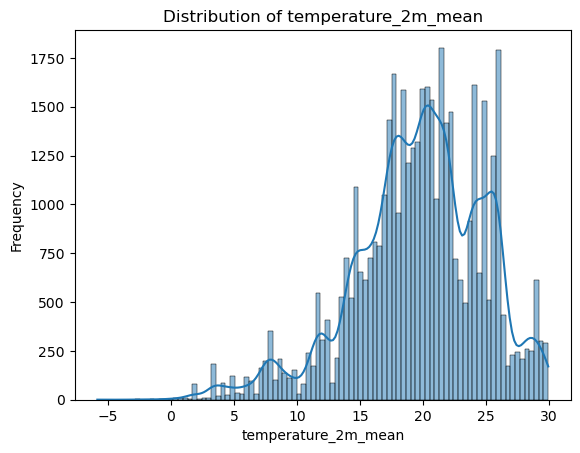

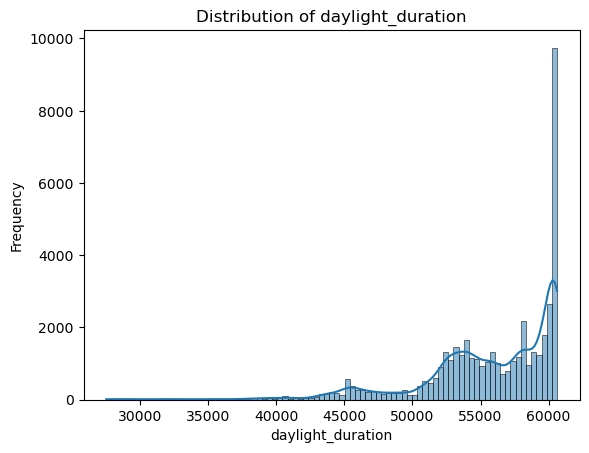

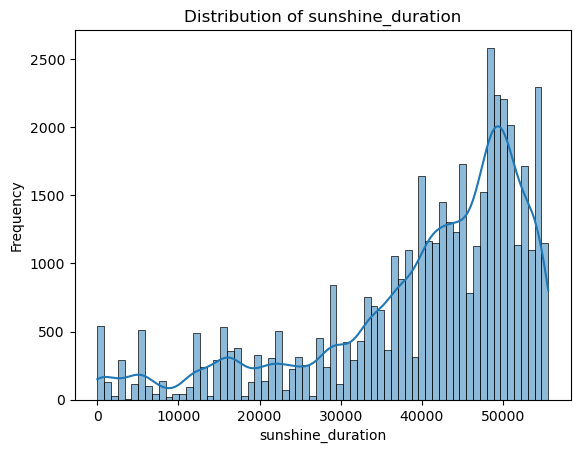

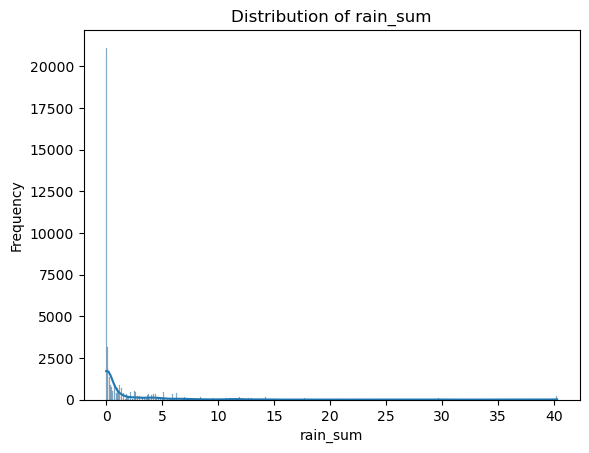

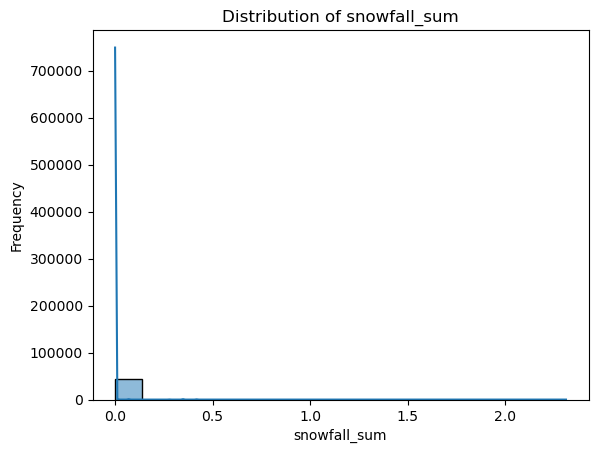

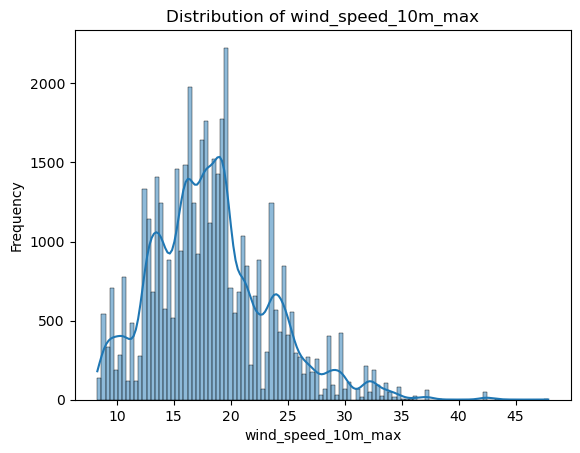

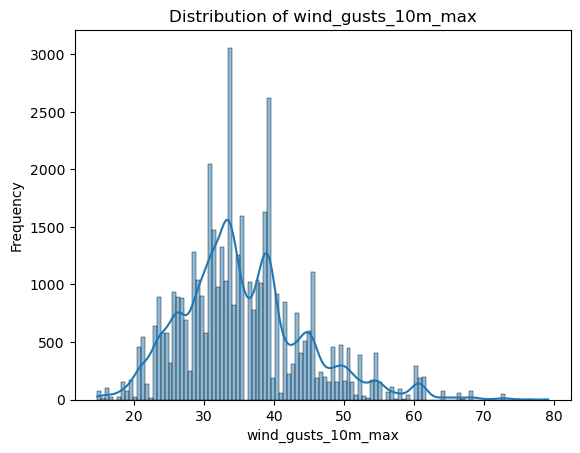

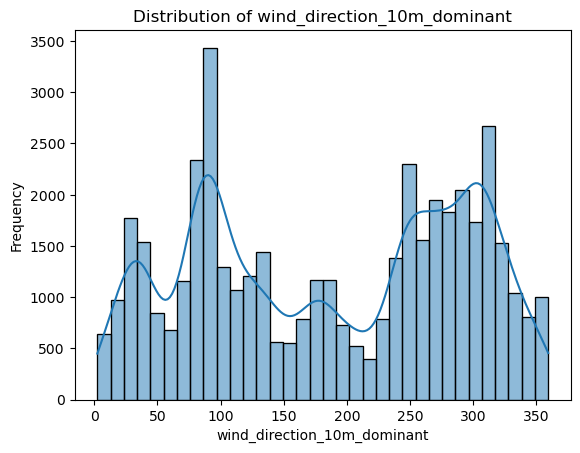

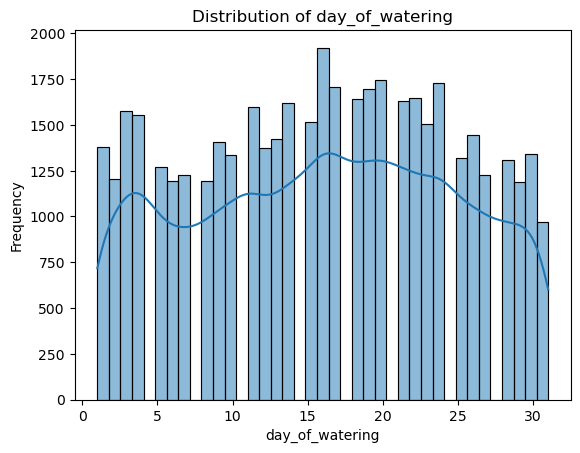

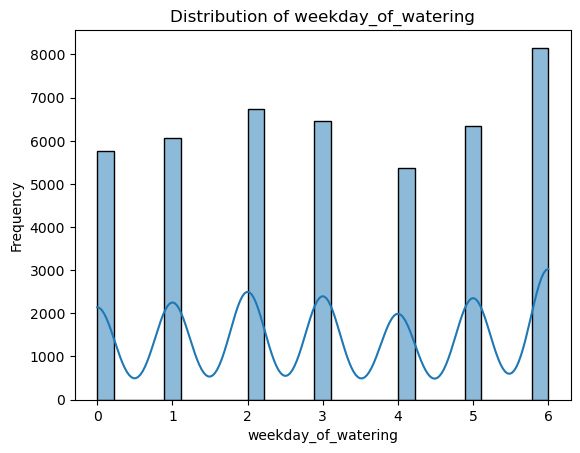

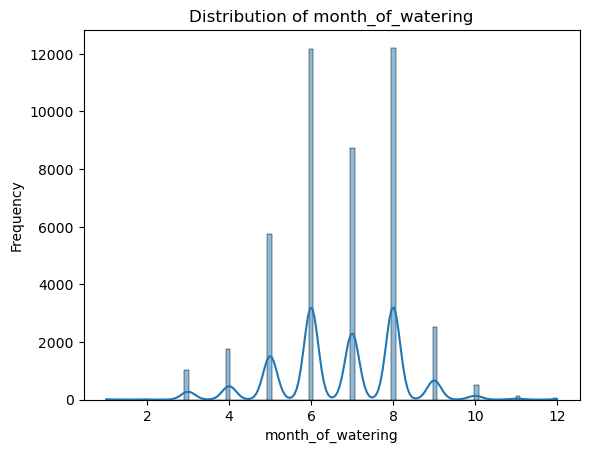

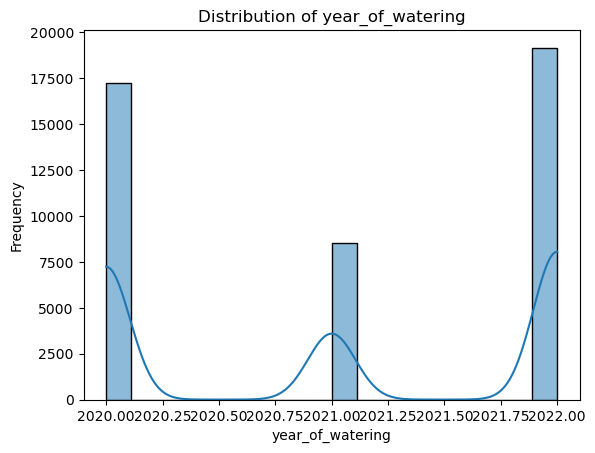

In [25]:
def plot_numerical_var(df):
    for col in df.columns:
        sns.histplot(df[col], kde=True)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()
        
plot_numerical_var(data_num_weather)

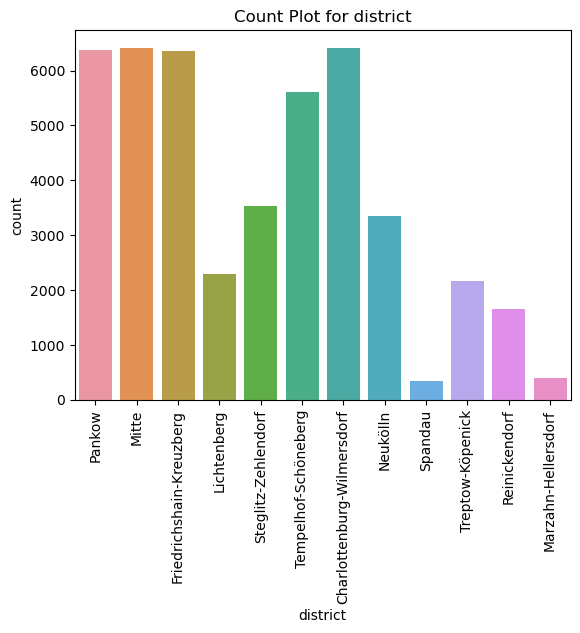

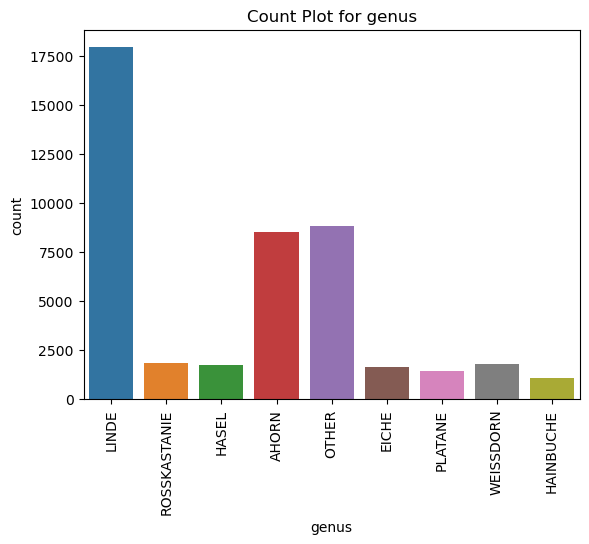

In [26]:
for col in data_cat.columns:
    g = sns.countplot(x=col, data=data_cat)
    plt.title(f"Count Plot for {col}")
    plt.setp(g.get_xticklabels(), rotation=90)
    plt.show()

In [27]:
data_num_socio['district']= data['district']
data_num_socio


,year,watering_quantity_in_liters,no_degree,with_degree,no_prof_qualification,prof_qualification,residents,avg_age,below 1500 (%),1500-2000 (%),2000-3000 (%),3000-4000 (%),4000 and more (%),gini_coefficient,at_risk_of_poverty_rate,unemployed,district
0,1984,10.0,0,313300,64100,266800,420768,41.2,17.6,11.0,24.6,13.9,32.9,0.30,12.1,3.1,Pankow
1,1984,25.0,0,313300,64100,266800,420768,41.2,17.6,11.0,24.6,13.9,32.9,0.30,12.1,3.1,Pankow
2,2005,10.0,20200,297700,94300,232400,395599,39.1,21.8,12.9,24.5,13.8,27.0,0.35,23.2,5.2,Mitte
3,1984,10.0,0,313300,64100,266800,420768,41.2,17.6,11.0,24.6,13.9,32.9,0.30,12.1,3.1,Pankow
4,1984,10.0,0,313300,64100,266800,420768,41.2,17.6,11.0,24.6,13.9,32.9,0.30,12.1,3.1,Pankow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44888,2005,10.0,20200,297700,94300,232400,395599,39.1,21.8,12.9,24.5,13.8,27.0,0.35,23.2,5.2,Mitte
44889,2005,10.0,20200,297700,94300,232400,395599,39.1,21.8,12.9,24.5,13.8,27.0,0.35,23.2,5.2,Mitte
44890,2005,10.0,20200,297700,94300,232400,395599,39.1,21.8,12.9,24.5,13.8,27.0,0.35,23.2,5.2,Mitte
44891,2005,10.0,20200,297700,94300,232400,395599,39.1,21.8,12.9,24.5,13.8,27.0,0.35,23.2,5.2,Mitte


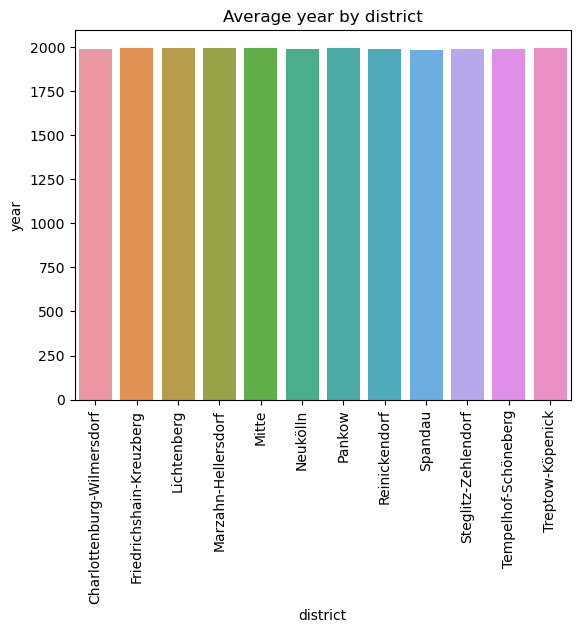

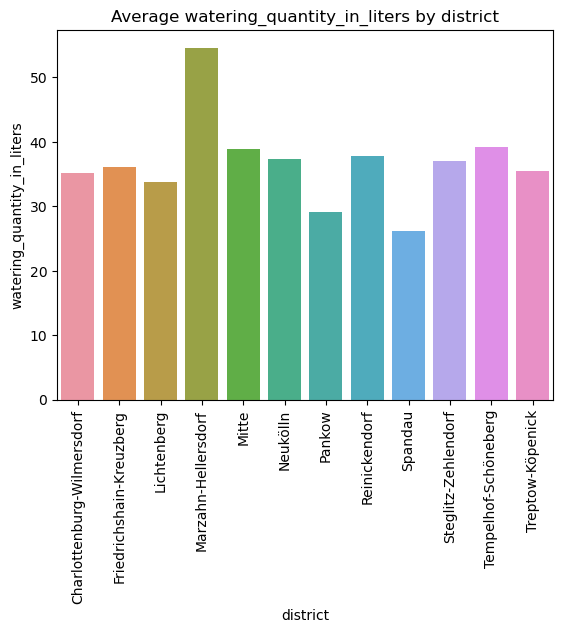

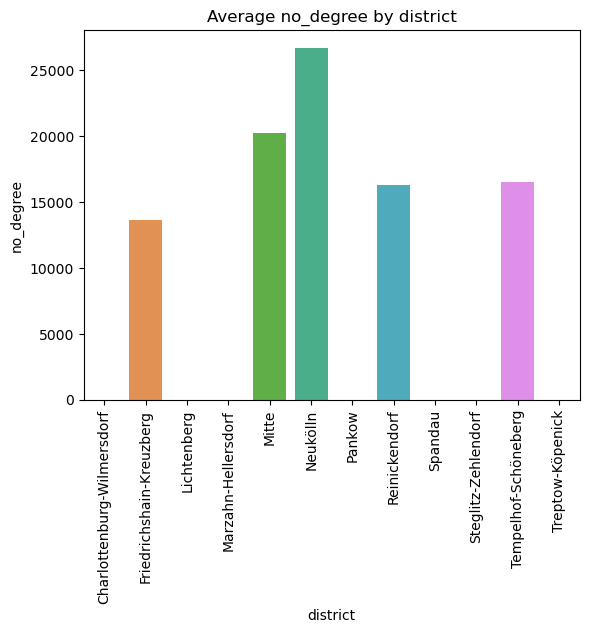

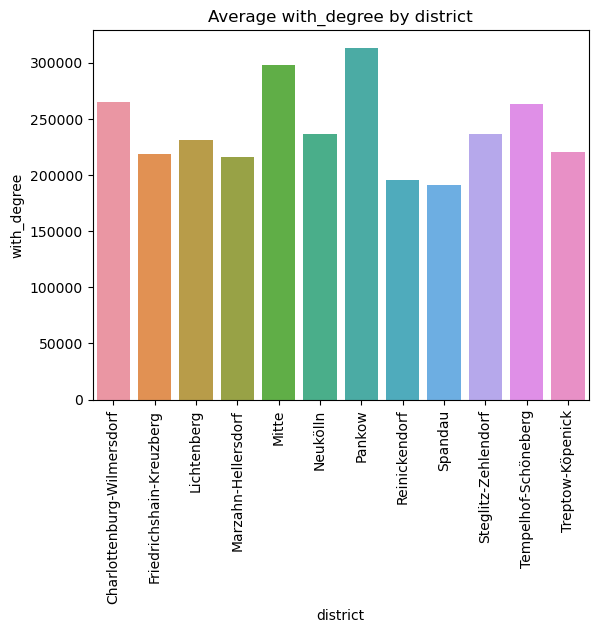

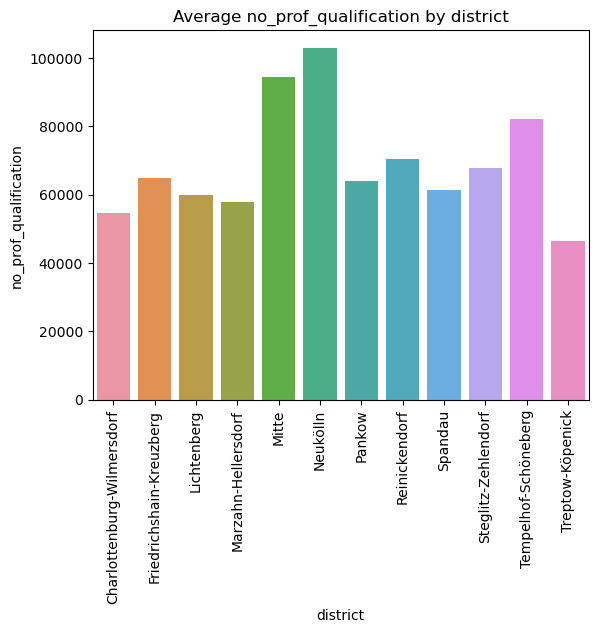

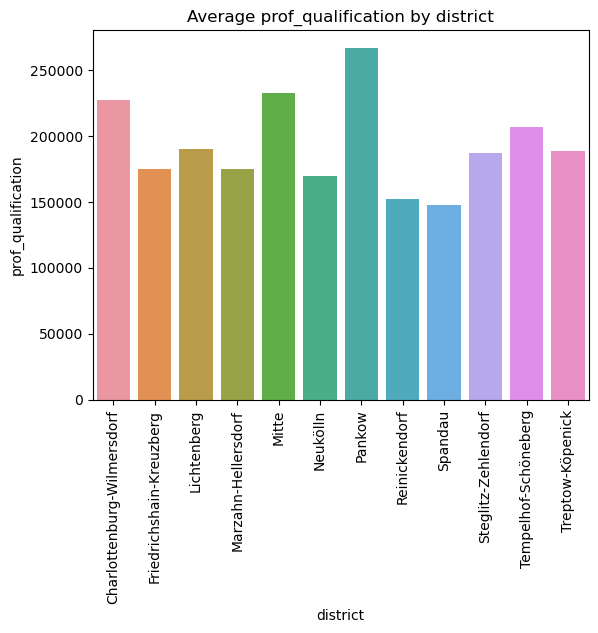

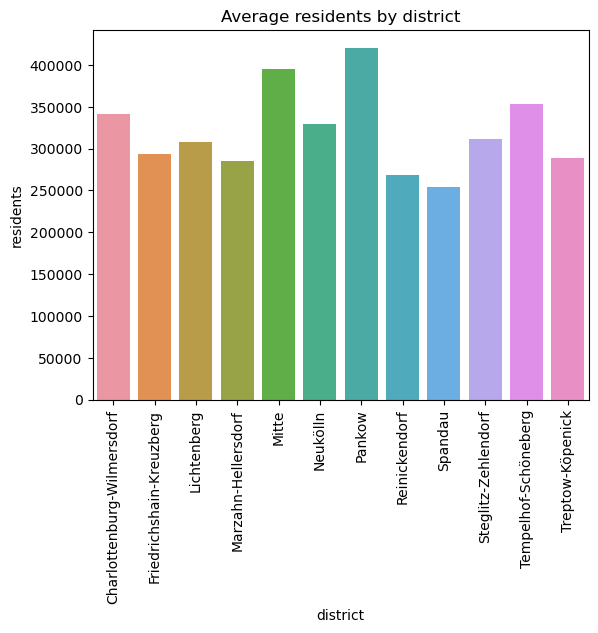

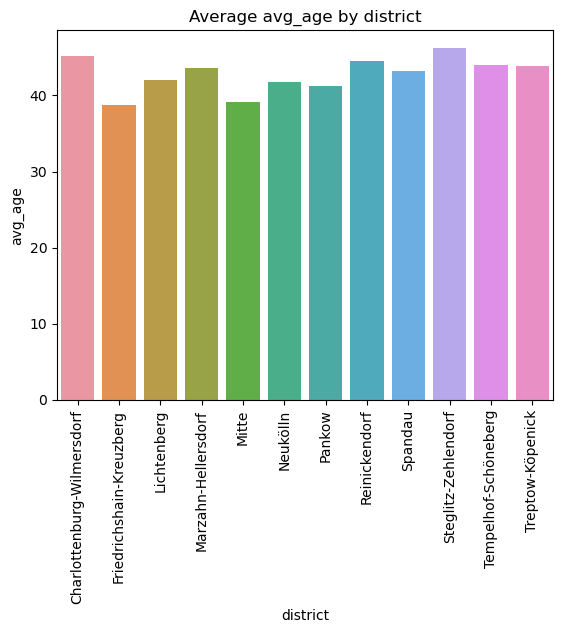

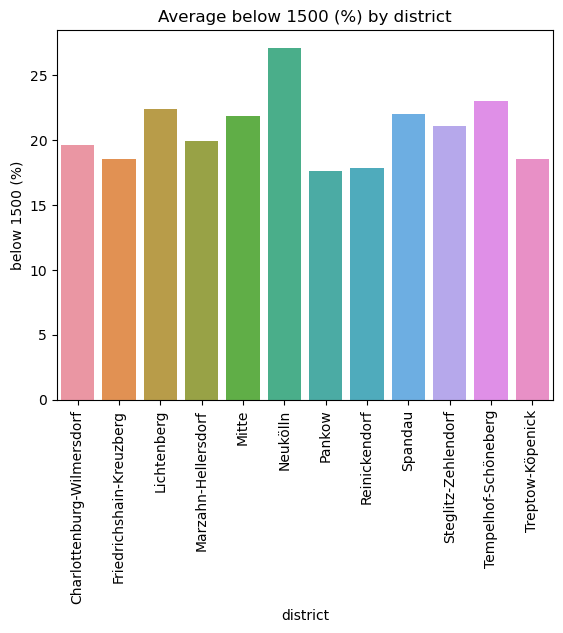

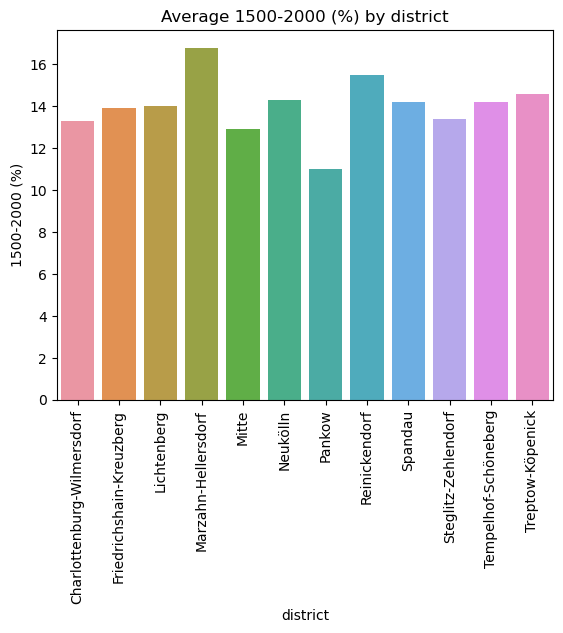

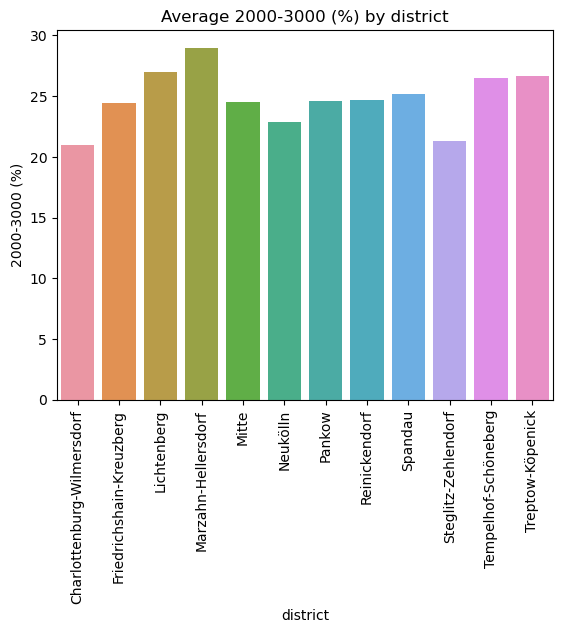

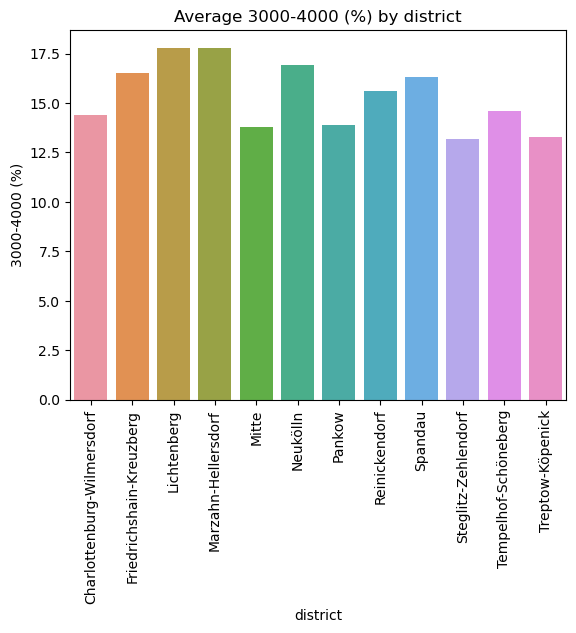

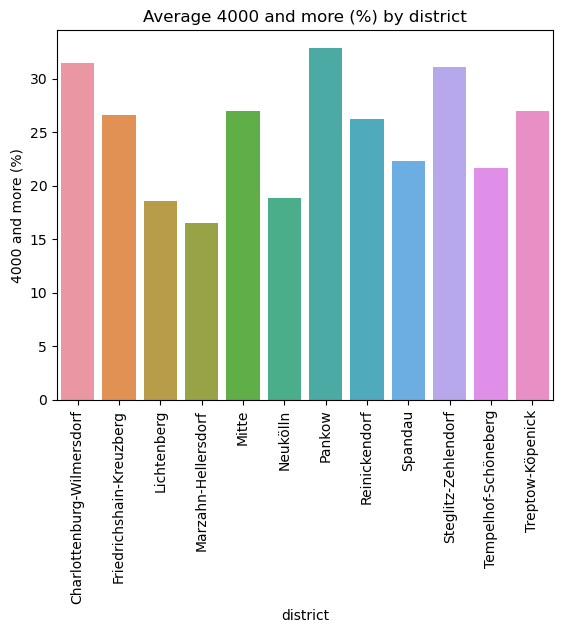

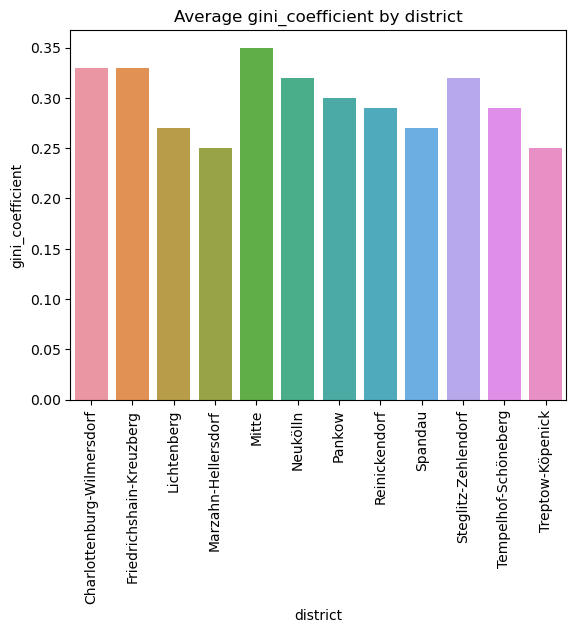

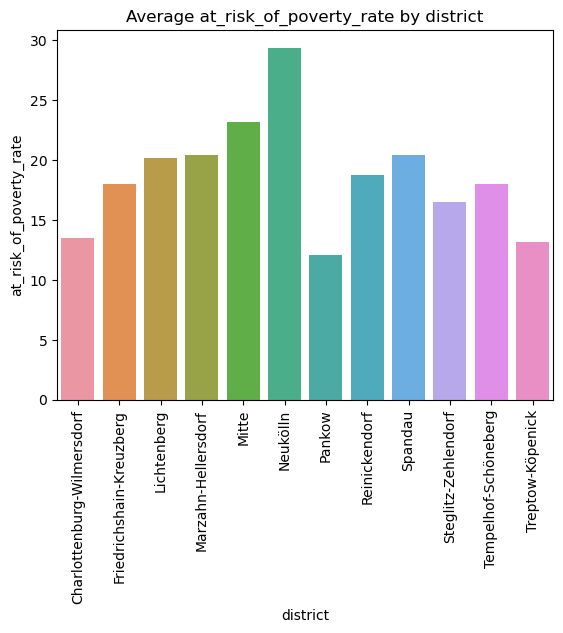

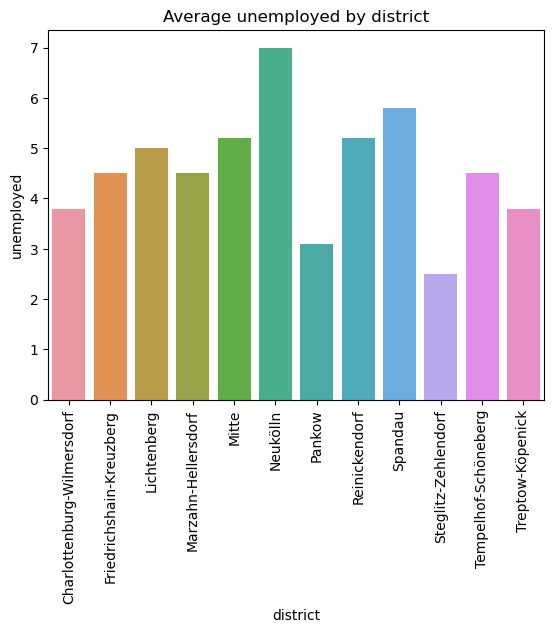

In [29]:
# Group data by 'district' and calculate the mean of each numeric variable
data_grouped = data_num_socio.groupby('district').mean().reset_index()

# Iterate over numeric columns and create bar plots
for col in data_grouped.columns:
    if col != 'district':  # Skip 'district' column
        g = sns.barplot(data=data_grouped, x='district', y=col)
        plt.title(f"Average {col} by district")
        plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
        plt.show()

## Hypothesis Testing

In [30]:
data['watering_quantity_in_liters'].mean()

35.907179292985546

In [31]:
#Hypothesis Testing
#we would expect that rich neigborhoods would give more water.
#we select a value for alpha of 0.05 (p-value threshold, significance level)

# One-sided test:
# Null hypothesis or H0: mean watering quantities <= 35,9 L
# Alternative hyp or H1: mean watering quantities > 35,9 L

In [32]:
watering_quantities = data[data['district'] == 'Pankow']['watering_quantity_in_liters'].dropna()
watering_quantities

0        10.0
1        25.0
3        10.0
4        10.0
6        50.0
         ... 
44875    10.0
44876    10.0
44877    10.0
44882    45.0
44887    60.0
Name: watering_quantity_in_liters, Length: 6379, dtype: float64

In [33]:
from scipy.stats import ttest_1samp
stat, pval = ttest_1samp(watering_quantities, 35.9)
print('stat is  ', stat)
print('pvalue for the one-tailed test is ', pval/2)

stat is   -24.190786187840594
pvalue for the one-tailed test is  4.551622591535148e-124


In [34]:
# We can not reject H0 because the stat is negative and we would have expecteda positive one.

In [35]:
#Let's see if it is true for the count of waterings
display(data.groupby(['district']).agg({'watering_quantity_in_liters':'count'}).sort_values(by='watering_quantity_in_liters', ascending=False))
data.groupby(['district']).agg({'watering_quantity_in_liters':'count'}).mean()


,watering_quantity_in_liters
district,
Mitte,6419
Charlottenburg-Wilmersdorf,6405
Pankow,6379
Friedrichshain-Kreuzberg,6358
Tempelhof-Schöneberg,5612
Steglitz-Zehlendorf,3526
Neukölln,3351
Lichtenberg,2291
Treptow-Köpenick,2157


watering_quantity_in_liters    3741.083333
dtype: float64

In [36]:
# we would expect parts of the city like Pankow which have a really high income to have more counts of watering, and it seems to be true.

## Save data

In [38]:
data_tableau = pd.concat([data_num, data_cat],axis=1)
data_tableau

,year,watering_quantity_in_liters,temperature_2m_max,temperature_2m_min,temperature_2m_mean,daylight_duration,sunshine_duration,rain_sum,snowfall_sum,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,no_degree,with_degree,no_prof_qualification,prof_qualification,residents,avg_age,below 1500 (%),1500-2000 (%),2000-3000 (%),3000-4000 (%),4000 and more (%),gini_coefficient,at_risk_of_poverty_rate,unemployed,day_of_watering,weekday_of_watering,month_of_watering,year_of_watering,district,genus
0,1984,10.0,4.058500,-2.8915,0.368917,43613.230,38995.04300,0.500000,0.70,27.475807,50.399998,14.954717,0,313300,64100,266800,420768,41.2,17.6,11.0,24.6,13.9,32.9,0.30,12.1,3.1,18,3,3,2021,Pankow,LINDE
1,1984,25.0,3.358500,-3.9915,0.258500,43863.105,25733.00400,0.000000,0.07,19.969458,33.839996,283.619020,0,313300,64100,266800,420768,41.2,17.6,11.0,24.6,13.9,32.9,0.30,12.1,3.1,19,4,3,2021,Pankow,LINDE
2,2005,10.0,9.158501,1.9585,5.046000,44112.766,18649.12300,2.100000,0.00,30.421598,54.719997,292.121980,20200,297700,94300,232400,395599,39.1,21.8,12.9,24.5,13.8,27.0,0.35,23.2,5.2,20,5,3,2021,Mitte,LINDE
3,1984,10.0,7.608500,3.6085,5.585583,44610.863,972.37836,0.000000,0.00,15.893093,27.720000,286.914670,0,313300,64100,266800,420768,41.2,17.6,11.0,24.6,13.9,32.9,0.30,12.1,3.1,22,0,3,2021,Pankow,LINDE
4,1984,10.0,7.608500,3.6085,5.585583,44610.863,972.37836,0.000000,0.00,15.893093,27.720000,286.914670,0,313300,64100,266800,420768,41.2,17.6,11.0,24.6,13.9,32.9,0.30,12.1,3.1,22,0,3,2021,Pankow,LINDE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44888,2005,10.0,-1.791500,-9.0415,-5.191500,27631.271,20366.82200,0.000000,0.00,10.086427,18.000000,49.323080,20200,297700,94300,232400,395599,39.1,21.8,12.9,24.5,13.8,27.0,0.35,23.2,5.2,15,3,12,2022,Mitte,LINDE
44889,2005,10.0,-2.491500,-7.4915,-5.847750,27569.947,21621.82000,0.000000,0.00,17.610588,29.160000,148.609790,20200,297700,94300,232400,395599,39.1,21.8,12.9,24.5,13.8,27.0,0.35,23.2,5.2,17,5,12,2022,Mitte,LINDE
44890,2005,10.0,6.808500,4.3085,5.558500,27526.953,0.00000,2.800000,0.00,16.394829,29.880000,210.208280,20200,297700,94300,232400,395599,39.1,21.8,12.9,24.5,13.8,27.0,0.35,23.2,5.2,20,1,12,2022,Mitte,LINDE
44891,2005,10.0,6.358500,3.2085,4.662667,27531.520,7266.53700,5.900001,0.00,13.202726,23.039999,228.884500,20200,297700,94300,232400,395599,39.1,21.8,12.9,24.5,13.8,27.0,0.35,23.2,5.2,22,3,12,2022,Mitte,LINDE


In [39]:
data_tableau['lat'] = data['lat']
data_tableau['lng'] = data['lng']
data_tableau

,year,watering_quantity_in_liters,temperature_2m_max,temperature_2m_min,temperature_2m_mean,daylight_duration,sunshine_duration,rain_sum,snowfall_sum,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,no_degree,with_degree,no_prof_qualification,prof_qualification,residents,avg_age,below 1500 (%),1500-2000 (%),2000-3000 (%),3000-4000 (%),4000 and more (%),gini_coefficient,at_risk_of_poverty_rate,unemployed,day_of_watering,weekday_of_watering,month_of_watering,year_of_watering,district,genus,lat,lng
0,1984,10.0,4.058500,-2.8915,0.368917,43613.230,38995.04300,0.500000,0.70,27.475807,50.399998,14.954717,0,313300,64100,266800,420768,41.2,17.6,11.0,24.6,13.9,32.9,0.30,12.1,3.1,18,3,3,2021,Pankow,LINDE,52.58571,13.40757
1,1984,25.0,3.358500,-3.9915,0.258500,43863.105,25733.00400,0.000000,0.07,19.969458,33.839996,283.619020,0,313300,64100,266800,420768,41.2,17.6,11.0,24.6,13.9,32.9,0.30,12.1,3.1,19,4,3,2021,Pankow,LINDE,52.58571,13.40757
2,2005,10.0,9.158501,1.9585,5.046000,44112.766,18649.12300,2.100000,0.00,30.421598,54.719997,292.121980,20200,297700,94300,232400,395599,39.1,21.8,12.9,24.5,13.8,27.0,0.35,23.2,5.2,20,5,3,2021,Mitte,LINDE,52.52184,13.35009
3,1984,10.0,7.608500,3.6085,5.585583,44610.863,972.37836,0.000000,0.00,15.893093,27.720000,286.914670,0,313300,64100,266800,420768,41.2,17.6,11.0,24.6,13.9,32.9,0.30,12.1,3.1,22,0,3,2021,Pankow,LINDE,52.58571,13.40757
4,1984,10.0,7.608500,3.6085,5.585583,44610.863,972.37836,0.000000,0.00,15.893093,27.720000,286.914670,0,313300,64100,266800,420768,41.2,17.6,11.0,24.6,13.9,32.9,0.30,12.1,3.1,22,0,3,2021,Pankow,LINDE,52.58571,13.40757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44888,2005,10.0,-1.791500,-9.0415,-5.191500,27631.271,20366.82200,0.000000,0.00,10.086427,18.000000,49.323080,20200,297700,94300,232400,395599,39.1,21.8,12.9,24.5,13.8,27.0,0.35,23.2,5.2,15,3,12,2022,Mitte,LINDE,52.52184,13.35009
44889,2005,10.0,-2.491500,-7.4915,-5.847750,27569.947,21621.82000,0.000000,0.00,17.610588,29.160000,148.609790,20200,297700,94300,232400,395599,39.1,21.8,12.9,24.5,13.8,27.0,0.35,23.2,5.2,17,5,12,2022,Mitte,LINDE,52.52184,13.35009
44890,2005,10.0,6.808500,4.3085,5.558500,27526.953,0.00000,2.800000,0.00,16.394829,29.880000,210.208280,20200,297700,94300,232400,395599,39.1,21.8,12.9,24.5,13.8,27.0,0.35,23.2,5.2,20,1,12,2022,Mitte,LINDE,52.52184,13.35009
44891,2005,10.0,6.358500,3.2085,4.662667,27531.520,7266.53700,5.900001,0.00,13.202726,23.039999,228.884500,20200,297700,94300,232400,395599,39.1,21.8,12.9,24.5,13.8,27.0,0.35,23.2,5.2,22,3,12,2022,Mitte,LINDE,52.52184,13.35009


In [40]:
data_tableau.to_csv('data_tableau.csv', index=False) 

In [41]:
data_tableau['year'].value_counts().sum()

44893

In [44]:
data_tableau['tree_age'] = 2022 - data_tableau['year'].astype(int)
older_than_100 = (data_tableau['tree_age'] > 100).sum()

print("Number of trees older than 100 years:", older_than_100)

Number of trees older than 100 years: 370
